In [1]:
import math
import random
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K, M, B, T
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint

exec(open('utils.py').read())
print('Loaded')


def pct_dist(a, b):
    return sq.lognorm(a, b, lclip=0.001, rclip=1, credibility=80) 


def lab_spend_on_largest_model_this_year(total_investment,
                                         percent_investment_spent_this_year,
                                         percent_spend_on_compute,
                                         percent_compute_on_biggest_model):
    return sq.dist_fn(total_investment * percent_investment_spent_this_year * percent_spend_on_compute * percent_compute_on_biggest_model,
                      fn=np.log10)


def bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend,
                                             percent_r_and_d_on_ai,
                                             percent_ai_spend_on_compute,
                                             percent_compute_on_biggest_model):
    return sq.dist_fn(annual_r_and_d_spend *
                      percent_r_and_d_on_ai *
                      percent_ai_spend_on_compute *
                      percent_compute_on_biggest_model, fn=np.log10)

print('Loaded')

Loaded
Loaded


## GPT3 Prediction (for calibration)

In [2]:
gpt3_prediction = lab_spend_on_largest_model_this_year(total_investment=1*B,
                                                       percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                       percent_spend_on_compute=pct_dist(0.3, 0.7),
                                                       percent_compute_on_biggest_model=pct_dist(0.05, 0.15))
samples = gpt3_prediction @ (100*K)

# See: https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=555410569
actual_gpt3_spend = 2.4*M

pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))
print('-')
print('Actual spend is at the {}th percentile of the model'.format(round(np.mean([s <= np.log10(actual_gpt3_spend) for s in samples]) * 100, 1)))


{1: '625 thousand',
 5: '1 million',
 10: '2 million',
 20: '2 million',
 30: '3 million',
 40: '4 million',
 50: '5 million',
 60: '6 million',
 70: '8 million',
 80: '10 million',
 90: '15 million',
 95: '21 million',
 99: '37 million'}
-
Actual spend is at the 21.2th percentile of the model


## GPT4 Prediction (for calibration)

In [3]:
gpt4_prediction = lab_spend_on_largest_model_this_year(total_investment=10*B,
                                                       percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                       percent_spend_on_compute=pct_dist(0.3, 0.7),
                                                       percent_compute_on_biggest_model=pct_dist(0.05, 0.15))
samples = gpt4_prediction @ (100*K)

# See: https://epochai.org/trends
actual_gpt4_spend = 40*M

pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))
print('-')
print('Actual spend is at the {}th percentile of the model'.format(round(np.mean([s <= np.log10(actual_gpt4_spend) for s in samples]) * 100, 1)))


{1: '6 million',
 5: '11 million',
 10: '16 million',
 20: '23 million',
 30: '31 million',
 40: '39 million',
 50: '49 million',
 60: '61 million',
 70: '77 million',
 80: '102 million',
 90: '150 million',
 95: '207 million',
 99: '375 million'}
-
Actual spend is at the 41.4th percentile of the model


## 2023 Spend Model

In [4]:
# OpenAI has 375 people as of 2023 Jan per https://twitter.com/sama/status/1617627882997813248
# if we assume it costs $500K per person and that payroll is half of non-compute costs, that means $375M per year is spent
largest_openai_model_2023_prediction = lab_spend_on_largest_model_this_year(total_investment=10*B,
                                                                            percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                            percent_spend_on_compute=pct_dist(0.3, 0.7),
                                                                            percent_compute_on_biggest_model=pct_dist(0.05, 0.2))
samples = largest_openai_model_2023_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '6 million',
 5: '12 million',
 10: '17 million',
 20: '25 million',
 30: '34 million',
 40: '44 million',
 50: '57 million',
 60: '72 million',
 70: '92 million',
 80: '124 million',
 90: '188 million',
 95: '267 million',
 99: '500 million'}


In [5]:
# https://www.nytimes.com/2023/01/27/technology/anthropic-ai-funding.html
# https://techcrunch.com/2023/04/06/anthropics-5b-4-year-plan-to-take-on-openai/
largest_anthropic_model_2023_prediction = lab_spend_on_largest_model_this_year(total_investment=1*B,
                                                                               percent_investment_spent_this_year=pct_dist(0.1, 0.3),
                                                                               percent_spend_on_compute=pct_dist(0.3, 0.7),
                                                                               percent_compute_on_biggest_model=pct_dist(0.1, 0.7))
samples = largest_anthropic_model_2023_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '2 million',
 5: '4 million',
 10: '6 million',
 20: '10 million',
 30: '13 million',
 40: '17 million',
 50: '21 million',
 60: '27 million',
 70: '34 million',
 80: '45 million',
 90: '67 million',
 95: '91 million',
 99: '153 million'}


In [6]:
largest_google_model_2023_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(22*B, 40*B),
                                                                                percent_r_and_d_on_ai=pct_dist(0.1, 0.7),
                                                                                percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                                percent_compute_on_biggest_model=pct_dist(0.001, 0.1))
samples = largest_google_model_2023_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '1 million',
 5: '2 million',
 10: '4 million',
 20: '7 million',
 30: '13 million',
 40: '21 million',
 50: '35 million',
 60: '59 million',
 70: '100 million',
 80: '187 million',
 90: '448 million',
 95: '920 million',
 99: '3 billion'}


In [7]:
largest_fb_model_2023_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(22*B, 40*B),
                                                                            percent_r_and_d_on_ai=pct_dist(0.01, 0.5),
                                                                            percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                            percent_compute_on_biggest_model=pct_dist(0.001, 0.1))
samples = largest_fb_model_2023_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '78 thousand',
 5: '276 thousand',
 10: '576 thousand',
 20: '1 million',
 30: '3 million',
 40: '6 million',
 50: '10 million',
 60: '18 million',
 70: '33 million',
 80: '70 million',
 90: '195 million',
 95: '438 million',
 99: '2 billion'}


In [8]:
us_gov_2023_prediction = sq.mixture([[0.2, 0],
                                     [0.75, sq.norm(6, 8, lclip=6)],
                                     [0.05, bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(10*B, 100*B),
                                                                                     percent_r_and_d_on_ai=1,
                                                                                     percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                                     percent_compute_on_biggest_model=pct_dist(0.001, 0.1))]])
samples = us_gov_2023_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))


{1: 1.0,
 5: 1.0,
 10: 1.0,
 20: 1.0,
 30: '2 million',
 40: '4 million',
 50: '7 million',
 60: '11 million',
 70: '18 million',
 80: '30 million',
 90: '66 million',
 95: '133 million',
 99: '838 million'}


In [9]:
uk_gov_2023_prediction = sq.mixture([[0.95, sq.norm(8, 9, lclip=8)],
                                     [0.05, bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(10*B, 100*B),
                                                                                     percent_r_and_d_on_ai=1,
                                                                                     percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                                     percent_compute_on_biggest_model=pct_dist(0.001, 0.1))]])
samples = uk_gov_2023_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))


{1: '32 million',
 5: '100 million',
 10: '120 million',
 20: '169 million',
 30: '213 million',
 40: '260 million',
 50: '312 million',
 60: '374 million',
 70: '454 million',
 80: '573 million',
 90: '789 million',
 95: '1 billion',
 99: '2 billion'}


In [10]:
china_gov_2023_prediction = sq.mixture([[0.1, 0],
                                        [0.8, sq.norm(6, 8, lclip=6)],
                                        [0.1, bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(10*B, 100*B),
                                                                                       percent_r_and_d_on_ai=1,
                                                                                       percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                                       percent_compute_on_biggest_model=pct_dist(0.001, 0.1))]])
samples = china_gov_2023_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))


{1: 1.0,
 5: 1.0,
 10: 1.0,
 20: '2 million',
 30: '4 million',
 40: '6 million',
 50: '10 million',
 60: '15 million',
 70: '23 million',
 80: '41 million',
 90: '96 million',
 95: '229 million',
 99: '2 billion'}


In [11]:
mixed_model = (largest_openai_model_2023_prediction >>
               sq.dist_max(largest_anthropic_model_2023_prediction) >>
               sq.dist_max(largest_google_model_2023_prediction) >>
               sq.dist_max(largest_fb_model_2023_prediction) >>
               sq.dist_max(us_gov_2023_prediction) >>
               sq.dist_max(uk_gov_2023_prediction) >>
               sq.dist_max(china_gov_2023_prediction))
mixed_model

<Distribution> max(max(max(max(max(max(log10(10000000000 * lognorm(lognorm_mean=0.16, lognorm_sd=0.12, norm_mean=-2.1, norm_sd=0.7, lclip=0.001, rclip=1) * lognorm(lognorm_mean=0.48, lognorm_sd=0.16, norm_mean=-0.78, norm_sd=0.33, lclip=0.001, rclip=1) * lognorm(lognorm_mean=0.12, lognorm_sd=0.07, norm_mean=-2.3, norm_sd=0.54, lclip=0.001, rclip=1)), log10(1000000000 * lognorm(lognorm_mean=0.19, lognorm_sd=0.09, norm_mean=-1.75, norm_sd=0.43, lclip=0.001, rclip=1) * lognorm(lognorm_mean=0.48, lognorm_sd=0.16, norm_mean=-0.78, norm_sd=0.33, lclip=0.001, rclip=1) * lognorm(lognorm_mean=0.35, lognorm_sd=0.31, norm_mean=-1.33, norm_sd=0.76, lclip=0.001, rclip=1))), log10(lognorm(lognorm_mean=30158709911.47, lognorm_sd=5526292630.83, norm_mean=24.11, norm_sd=0.18) * lognorm(lognorm_mean=0.35, lognorm_sd=0.31, norm_mean=-1.33, norm_sd=0.76, lclip=0.001, rclip=1) * lognorm(lognorm_mean=0.48, lognorm_sd=0.16, norm_mean=-0.78, norm_sd=0.33, lclip=0.001, rclip=1) * lognorm(lognorm_mean=0.05, log

In [12]:
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(mixed_model @ (100*K)).items()]))

{1: '100 million',
 5: '127 million',
 10: '162 million',
 20: '219 million',
 30: '273 million',
 40: '332 million',
 50: '401 million',
 60: '488 million',
 70: '607 million',
 80: '800 million',
 90: '1 billion',
 95: '2 billion',
 99: '6 billion'}


## 2025 Spend Model

In [13]:
largest_openai_model_2025_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(10*B, 50*B),
                                                                            percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                            percent_spend_on_compute=pct_dist(0.3, 0.7),
                                                                            percent_compute_on_biggest_model=pct_dist(0.05, 0.2))
samples = largest_openai_model_2025_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '11 million',
 5: '22 million',
 10: '32 million',
 20: '52 million',
 30: '72 million',
 40: '96 million',
 50: '126 million',
 60: '165 million',
 70: '219 million',
 80: '306 million',
 90: '489 million',
 95: '721 million',
 99: '1 billion'}


In [14]:
# https://www.nytimes.com/2023/01/27/technology/anthropic-ai-funding.html
# https://techcrunch.com/2023/04/06/anthropics-5b-4-year-plan-to-take-on-openai/
largest_anthropic_model_2025_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(1*B, 50*B),
                                                                               percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                               percent_spend_on_compute=pct_dist(0.3, 0.7),
                                                                               percent_compute_on_biggest_model=pct_dist(0.05, 0.2))
samples = largest_anthropic_model_2025_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '1 million',
 5: '3 million',
 10: '6 million',
 20: '11 million',
 30: '18 million',
 40: '27 million',
 50: '40 million',
 60: '58 million',
 70: '88 million',
 80: '143 million',
 90: '277 million',
 95: '482 million',
 99: '1 billion'}


In [15]:
largest_google_model_2025_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(22*B, 50*B),
                                                                                percent_r_and_d_on_ai=pct_dist(0.1, 0.8),
                                                                                percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                                percent_compute_on_biggest_model=pct_dist(0.001, 0.1))
samples = largest_google_model_2025_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '1 million',
 5: '3 million',
 10: '4 million',
 20: '9 million',
 30: '15 million',
 40: '25 million',
 50: '42 million',
 60: '70 million',
 70: '119 million',
 80: '224 million',
 90: '539 million',
 95: '1 billion',
 99: '4 billion'}


In [16]:
largest_fb_model_2025_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(22*B, 50*B),
                                                                            percent_r_and_d_on_ai=pct_dist(0.05, 0.6),
                                                                            percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                            percent_compute_on_biggest_model=pct_dist(0.001, 0.1))
samples = largest_fb_model_2025_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '517 thousand',
 5: '1 million',
 10: '2 million',
 20: '5 million',
 30: '9 million',
 40: '16 million',
 50: '27 million',
 60: '45 million',
 70: '78 million',
 80: '149 million',
 90: '371 million',
 95: '777 million',
 99: '3 billion'}


In [17]:
us_gov_2025_prediction = sq.mixture([[0.1, 0],
                                     [0.6, sq.norm(6, 8, lclip=6)],
                                     [0.3, bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(10*B, 100*B),
                                                                                    percent_r_and_d_on_ai=1,
                                                                                    percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                                    percent_compute_on_biggest_model=pct_dist(0.001, 0.1))]])
samples = us_gov_2025_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))


{1: 1.0,
 5: 1.0,
 10: 1.0,
 20: '3 million',
 30: '5 million',
 40: '9 million',
 50: '15 million',
 60: '25 million',
 70: '46 million',
 80: '103 million',
 90: '353 million',
 95: '961 million',
 99: '5 billion'}


In [18]:
uk_gov_2025_prediction = sq.mixture([[0.6, sq.norm(8, 9, lclip=8)],
                                     [0.4, bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(10*B, 100*B),
                                                                                    percent_r_and_d_on_ai=1,
                                                                                    percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                                    percent_compute_on_biggest_model=pct_dist(0.001, 0.1))]])
samples = uk_gov_2025_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '7 million',
 5: '19 million',
 10: '40 million',
 20: '100 million',
 30: '156 million',
 40: '212 million',
 50: '273 million',
 60: '346 million',
 70: '448 million',
 80: '608 million',
 90: '966 million',
 95: '2 billion',
 99: '7 billion'}


In [19]:
china_gov_2025_prediction = sq.mixture([[0.05, 0],
                                        [0.55, sq.norm(6, 8, lclip=6)],
                                        [0.4, bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(10*B, 100*B),
                                                                                       percent_r_and_d_on_ai=1,
                                                                                       percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                                       percent_compute_on_biggest_model=pct_dist(0.001, 0.1))]])
samples = china_gov_2025_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: 1.0,
 5: 1.0,
 10: '2 million',
 20: '4 million',
 30: '8 million',
 40: '13 million',
 50: '22 million',
 60: '37 million',
 70: '71 million',
 80: '167 million',
 90: '542 million',
 95: '1 billion',
 99: '6 billion'}


In [20]:
mixed_model_2025 = (largest_openai_model_2025_prediction >>
                    sq.dist_max(largest_anthropic_model_2025_prediction) >>
                    sq.dist_max(largest_google_model_2025_prediction) >>
                    sq.dist_max(largest_fb_model_2025_prediction) >>
                    sq.dist_max(us_gov_2025_prediction) >>
                    sq.dist_max(uk_gov_2025_prediction) >>
                    sq.dist_max(china_gov_2025_prediction))
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(mixed_model_2025 @ (100*K)).items()]))

{1: '87 million',
 5: '150 million',
 10: '200 million',
 20: '285 million',
 30: '370 million',
 40: '465 million',
 50: '585 million',
 60: '751 million',
 70: '1 billion',
 80: '1 billion',
 90: '3 billion',
 95: '5 billion',
 99: '15 billion'}


In [21]:
# TODO: Fix bug
#print('2023->2025 Doubling Rate (years)')
#rate_model = sq.growth_rate_to_doubling_time((((mixed_model_2025 / mixed_model) - 1) / 2) + 1)
#pprint(dict([(i[0], i[1]) for i in sq.get_percentiles(rate_model @ (100*K), digits=3).items()]))

In [22]:
print('2023->2025 Doubling Rate (years)')
rate_model = (((mixed_model_2025 / mixed_model) - 1) / 2) + 1
pprint(dict([(i[0], np.round(sq.growth_rate_to_doubling_time(i[1]), 3)) for i in sq.get_percentiles(rate_model @ (100*K)).items()]))

2023->2025 Doubling Rate (years)
{1: 1.051,
 5: 1.031,
 10: 1.022,
 20: 1.012,
 30: 1.005,
 40: 0.999,
 50: 0.993,
 60: 0.987,
 70: 0.981,
 80: 0.973,
 90: 0.962,
 95: 0.952,
 99: 0.933}


## Cache spend model

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40000/40000 [00:00<00:00, 2171554.90it/s]

Writing cache to file `caches/initial_pay.sqcache.npy`...
...Cached
{1: 8.0,
 5: 8.1,
 10: 8.2,
 20: 8.3,
 30: 8.4,
 40: 8.5,
 50: 8.6,
 60: 8.7,
 70: 8.8,
 80: 8.9,
 90: 9.1,
 95: 9.3,
 99: 9.8}


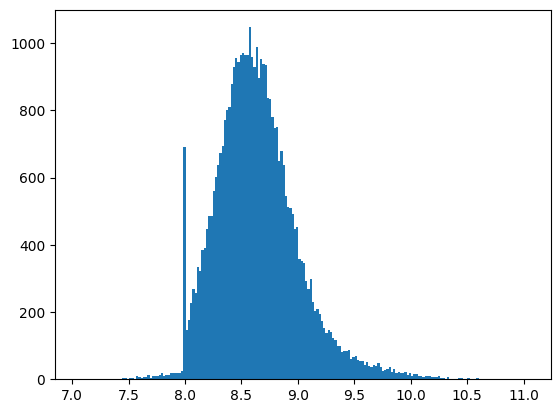

In [23]:
# Output expected willingness to pay for a model in 2023, using log 2022$USD
log_initial_pay_samples = sq.sample(mixed_model, dump_cache_file='caches/initial_pay', n=40000, verbose=True)
pprint(sq.get_percentiles(log_initial_pay_samples, digits=1))
plt.hist(log_initial_pay_samples, bins=200)
plt.show()